# Import Essential Libraries

In [47]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Import Plotly

In [48]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

## Natural Language Processing (NLP) Libraries


In [49]:
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy


### Gensim package

In [50]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### pyLDAVis package

In [51]:
!pip install pyLDAvis

In [52]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


### NLTK Package

In [53]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Mount Google Drive

In [9]:
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# Import Text Data

In [54]:
df = pd.read_csv('data/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3             asian stocks sink euro near nine year   business  
4                 us oil prices slip below 50 a barr  business

Article       Date  \
2687  strong>DUBAI: Dubai International Airport and ...  3/25/2017   
2688  strong>BEIJING: Former Prime Minister, Shaukat...  3/26/2017   
2689  strong>WASHINGTON: Uber has grounded its fleet...  3/26/2017   
2690  strong>BEIJING: The New Development Bank plans...  3/27/2017   
2691  strong>KARACHI: Karachi-based technology incub...  3/27/2017   

                                                Heading  NewsType  
2687    Laptop ban hits Dubai for 11m weekend traveller  business  
2688  Pak China relations not against any third coun...  business  
2689         Uber grounds self driving cars after accid  business  
2690  New Development Bank plans joint investments i...  business  
2691  Google powered Startup Weekend energizing prou...  business

# Tokenize: Parse each sentence to words/terms/tokens

In [55]:
df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  \
0  sindh govt decides to cut public transport far...  business   
1                    asia stocks up in new year trad  business   
2           hong kong stocks open 0.66 percent lower  business   
3             asian stocks sink euro near nine year   business   
4                 us oil prices slip below 50 a barr  business   

                                               token  
0  [karachi, the, sindh, government, has, decided...  
1  [hong, kong, asian, markets, started, on, an, ...  
2  [hong, kong, hong, kong, shares, opened, perce...  
3  [hong, kong, asian, markets, tumbled, tuesday,...  
4  [new, york, us, oil, prices, monday, slipped, ...

# Making Bigram and Trigram models

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['token'], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['token']], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


# Remove Stop words

## Define stop word removal functions

In [56]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

## Now, use stop word removal functions

In [57]:
display('before: ', df['token'].head())

'before: '

0    [karachi, the, sindh, government, has, decided...
1    [hong, kong, asian, markets, started, on, an, ...
2    [hong, kong, hong, kong, shares, opened, perce...
3    [hong, kong, asian, markets, tumbled, tuesday,...
4    [new, york, us, oil, prices, monday, slipped, ...
Name: token, dtype: object

In [58]:
# Remove Stop Words
df['token'] = remove_stopwords(df['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [59]:
display('after: ' ,df['token'].head())

'after: '

0    [government, decide, bring, public, transport,...
1    [market, start, upswe, limited, trading, mainl...
2    [share, open, percent, low, follow, tepid, lea...
3    [tumble, follow, painful, loss, sit, year, low...
4    [oil, price, slip, barrel, first, time, year, ...
Name: token, dtype: object

# Creating Corpus and Vocubulary

In [60]:
# Create Dictionary
id2word = corpora.Dictionary(df['token'])

# Create Corpus
texts = df['token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])
# id2word[0]

In [61]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('add', 1),
  ('applicable', 1),
  ('bring', 1),
  ('cent', 1),
  ('charge', 1),
  ('commuter', 1),
  ('compare', 1),
  ('compress', 1),
  ('country', 1),
  ('cut', 1),
  ('decide', 1),
  ('decision', 1),
  ('decrease', 1),
  ('due', 1),
  ('fare', 4),
  ('federal', 1),
  ('gas', 1),
  ('government', 3),
  ('irshad', 1),
  ('low', 1),
  ('make', 1),
  ('massive', 1),
  ('mean', 1),
  ('meanwhile', 1),
  ('natural', 1),
  ('news', 1),
  ('part', 1),
  ('pc', 1),
  ('petroleum', 1),
  ('price', 2),
  ('product', 1),
  ('public', 2),
  ('reduction', 2),
  ('refuse', 1),
  ('report', 1),
  ('rickshaw', 1),
  ('run', 1),
  ('say', 3),
  ('source', 1),
  ('taxi', 1),
  ('transport', 2),
  ('transporter', 1),
  ('travel', 1),
  ('vehicle', 1)]]

# Build LDA Model

In [23]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=3, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

# Visualize LDA Topics

# Making Word2Vec Model

## Training word2vec model

In [63]:
w2vmodel = Word2Vec(texts, size=16, window=5, min_count=5, workers=4)

In [64]:
list_1 = w2vmodel.wv.most_similar('use',topn=10)
# list_2 = w2vmodel.wv.most_similar('problems',topn=100)

word_list_1 = []

for l in list_1:
    word_list_1.append(l[0])
print(word_list_1)

['provide', 'offer', 'technology', 'insurance', 'pk', 'engineering', 'opic', 'officer', 'opportunity', 'measure']


## Visualizing w2v

In [65]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      #size_max=55, 
      text = labels,
      #range_x=[-50, 50], 
      #range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()
# pass

In [66]:
tsne_plot(w2vmodel)

**(iii) From the word2vec visualization, identify 5-word pairs that are close to each other and make sense.** \
Practice & Training \
Allocate & Borrower\
Exciting & Hot\
Suspension & Limited
Stock & Trade \
Fall & Rise\
High & Low




# Word Cloud

In [67]:
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('say', 6599), ('year', 3641), ('percent', 3304), ('strong', 2330), ('first', 2110), ('last', 1945), ('also', 1945), ('price', 1854), ('oil', 1814), ('market', 1806), ('make', 1743), ('take', 1602), ('would', 1549), ('team', 1504), ('day', 1469), ('match', 1463), ('test', 1458), ('run', 1373), ('month', 1372), ('time', 1358), ('play', 1357), ('world', 1260), ('week', 1250), ('wicket', 1237), ('country', 1219), ('high', 1200), ('add', 1141), ('second', 1085), ('fall', 1041), ('come', 1022), ('ball', 1016), ('rise', 1003), ('could', 961), ('low', 948), ('go', 925), ('crude', 917), ('government', 916), ('player', 908), ('see', 878), ('rate', 872), ('global', 818), ('final', 817), ('good', 814), ('early', 813), ('dollar', 801), ('lead', 800), ('cricket', 782), ('include', 775), ('game', 774), ('give', 768), ('get', 766), ('start', 763), ('win', 755), ('new', 749), ('point', 748), ('expect', 747), ('end', 742), ('leave', 741), ('barrel', 740), ('tell', 737), ('score', 712), ('increase', 70

(-0.5, 1599.5, 799.5, -0.5)

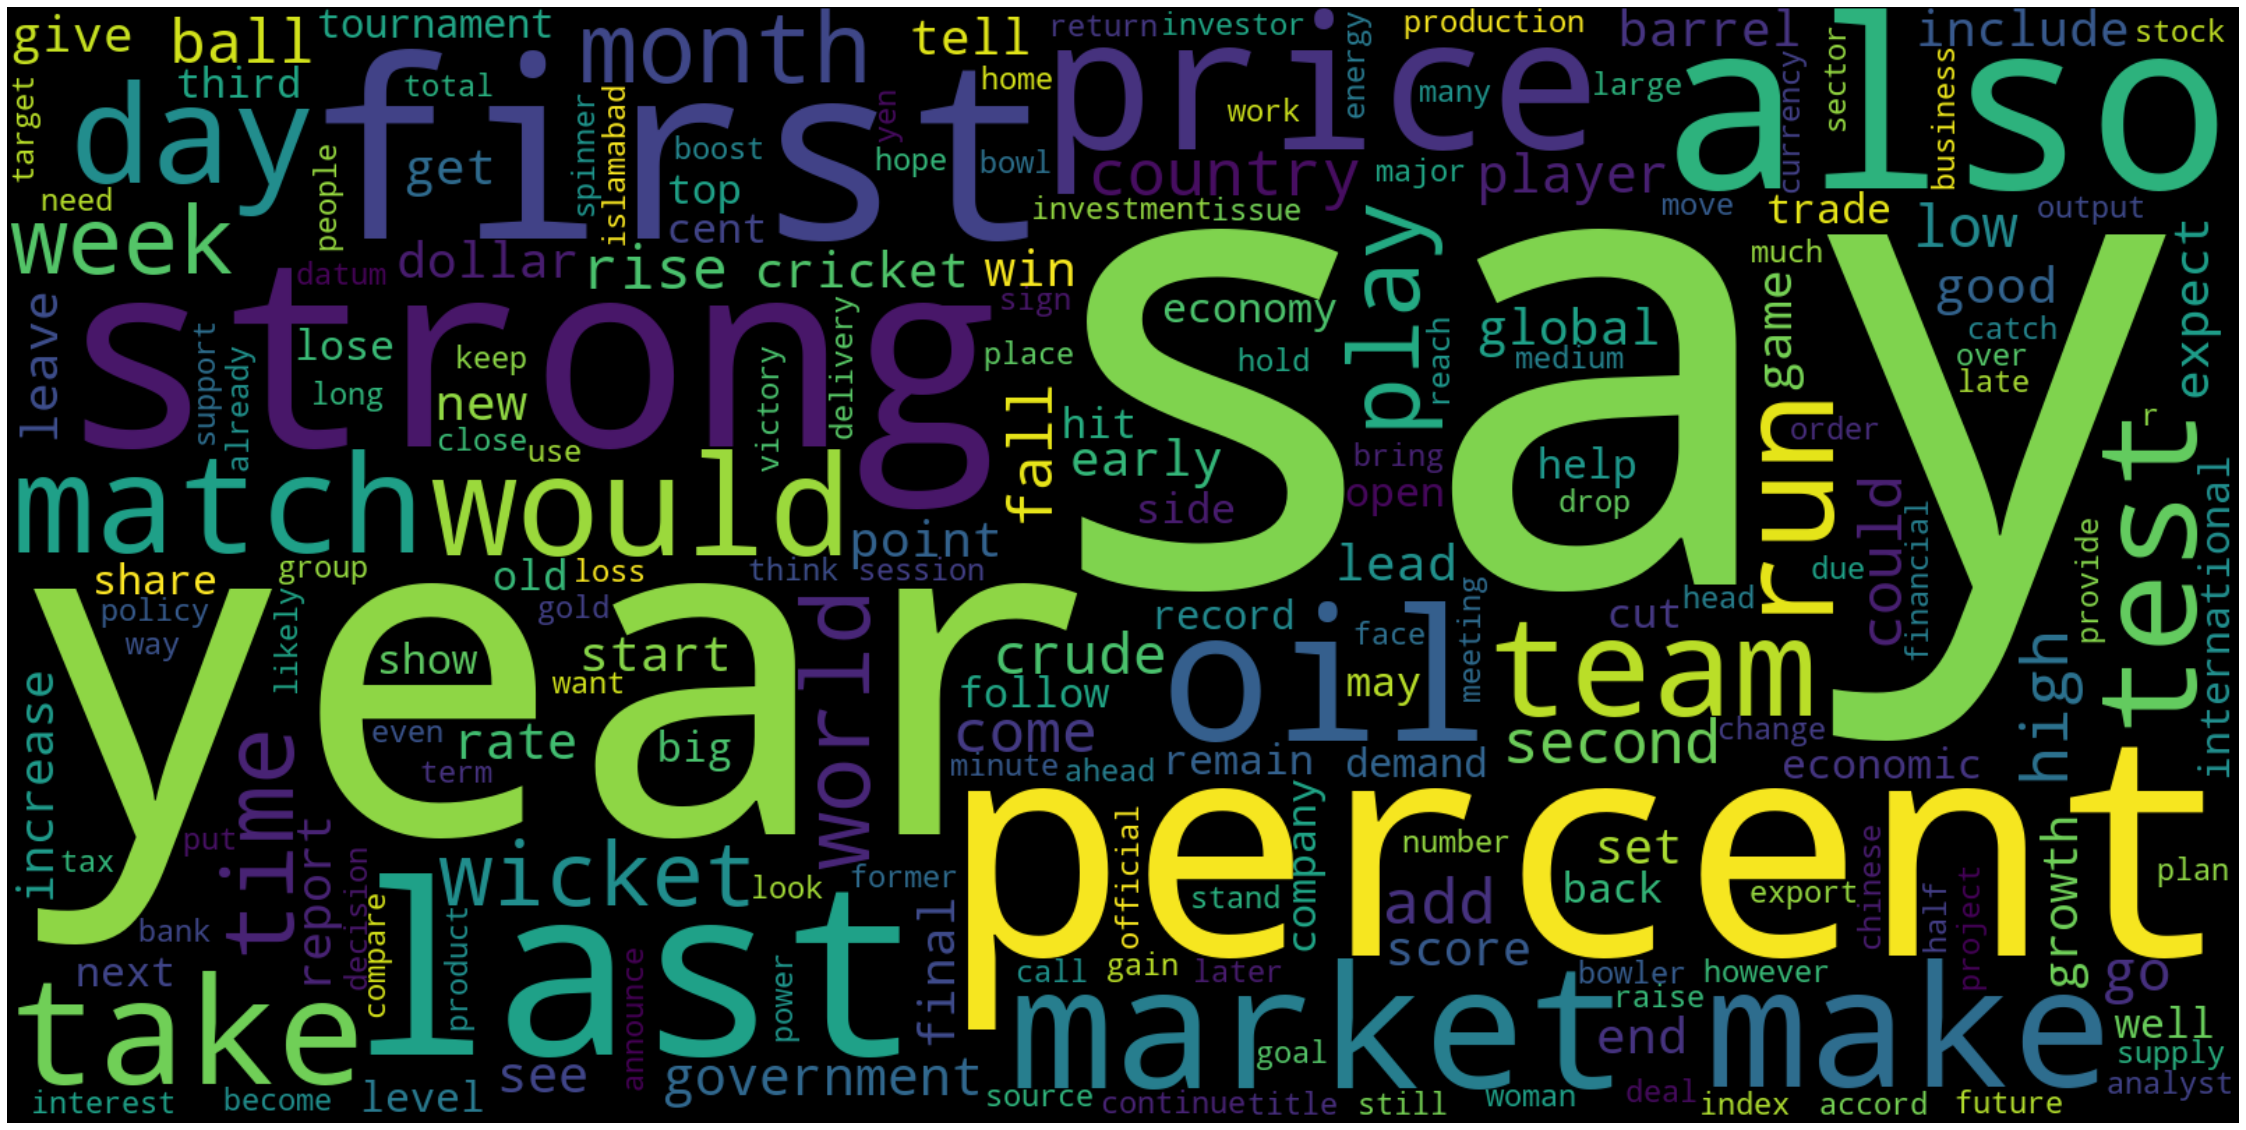

In [68]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

**E)**

In [69]:


df_=df[["Article"]]
df_.head()
df_['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  \
0  sindh govt decides to cut public transport far...  business   
1                    asia stocks up in new year trad  business   
2           hong kong stocks open 0.66 percent lower  business   
3             asian stocks sink euro near nine year   business   
4                 us oil prices slip below 50 a barr  business   

                                               token  
0  [government, decide, bring, public, transport,...  
1  [market, start, upswe, limited, trading, mainl...  
2  [share, open, percent, low, follow, tepid, lea...  
3  [tumble, follow, painful, loss, sit, year, low...  
4  [oil, price, slip, barrel, first, time, year, ...

In [70]:
from collections import Counter

words = df_.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('the', 47111), ('to', 21850), ('in', 20853), ('of', 18583), ('and', 17328), ('for', 9523), ('on', 9303), ('said', 6043), ('at', 6015), ('with', 5775), ('that', 5677), ('was', 5224), ('as', 5001), ('is', 4611), ('by', 4521), ('from', 4425), ('he', 4298), ('it', 4092), ('his', 3551), ('has', 3382), ('will', 3381), ('percent', 3318), ('pakistan', 3229), ('be', 3144), ('after', 3079), ('year', 2941), ('have', 2873), ('an', 2824), ('but', 2741), ('their', 2534), ('first', 2391), ('are', 2357), ('strong', 2285), ('this', 2284), ('had', 2282), ('world', 2103), ('its', 2057), ('up', 1997), ('not', 1992), ('oil', 1977), ('two', 1962), ('were', 1959), ('also', 1945), ('last', 1923), ('which', 1870), ('new', 1849), ('who', 1840), ('we', 1807), ('one', 1771), ('against', 1759), ('been', 1735), ('over', 1707), ('they', 1623), ('out', 1569), ('england', 1561), ('more', 1558), ('would', 1548), ('us', 1488), ('while', 1460), ('three', 1448), ('million', 1417), ('cricket', 1402), ('test', 1402), ('pr

In [71]:
from collections import Counter

words = df_.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('the', 47111), ('to', 21850), ('in', 20853), ('of', 18583), ('and', 17328), ('for', 9523), ('on', 9303), ('said', 6043), ('at', 6015), ('with', 5775), ('that', 5677), ('was', 5224), ('as', 5001), ('is', 4611), ('by', 4521), ('from', 4425), ('he', 4298), ('it', 4092), ('his', 3551), ('has', 3382), ('will', 3381), ('percent', 3318), ('pakistan', 3229), ('be', 3144), ('after', 3079), ('year', 2941), ('have', 2873), ('an', 2824), ('but', 2741), ('their', 2534), ('first', 2391), ('are', 2357), ('strong', 2285), ('this', 2284), ('had', 2282), ('world', 2103), ('its', 2057), ('up', 1997), ('not', 1992), ('oil', 1977), ('two', 1962), ('were', 1959), ('also', 1945), ('last', 1923), ('which', 1870), ('new', 1849), ('who', 1840), ('we', 1807), ('one', 1771), ('against', 1759), ('been', 1735), ('over', 1707), ('they', 1623), ('out', 1569), ('england', 1561), ('more', 1558), ('would', 1548), ('us', 1488), ('while', 1460), ('three', 1448), ('million', 1417), ('cricket', 1402), ('test', 1402), ('pr

(-0.5, 1599.5, 799.5, -0.5)

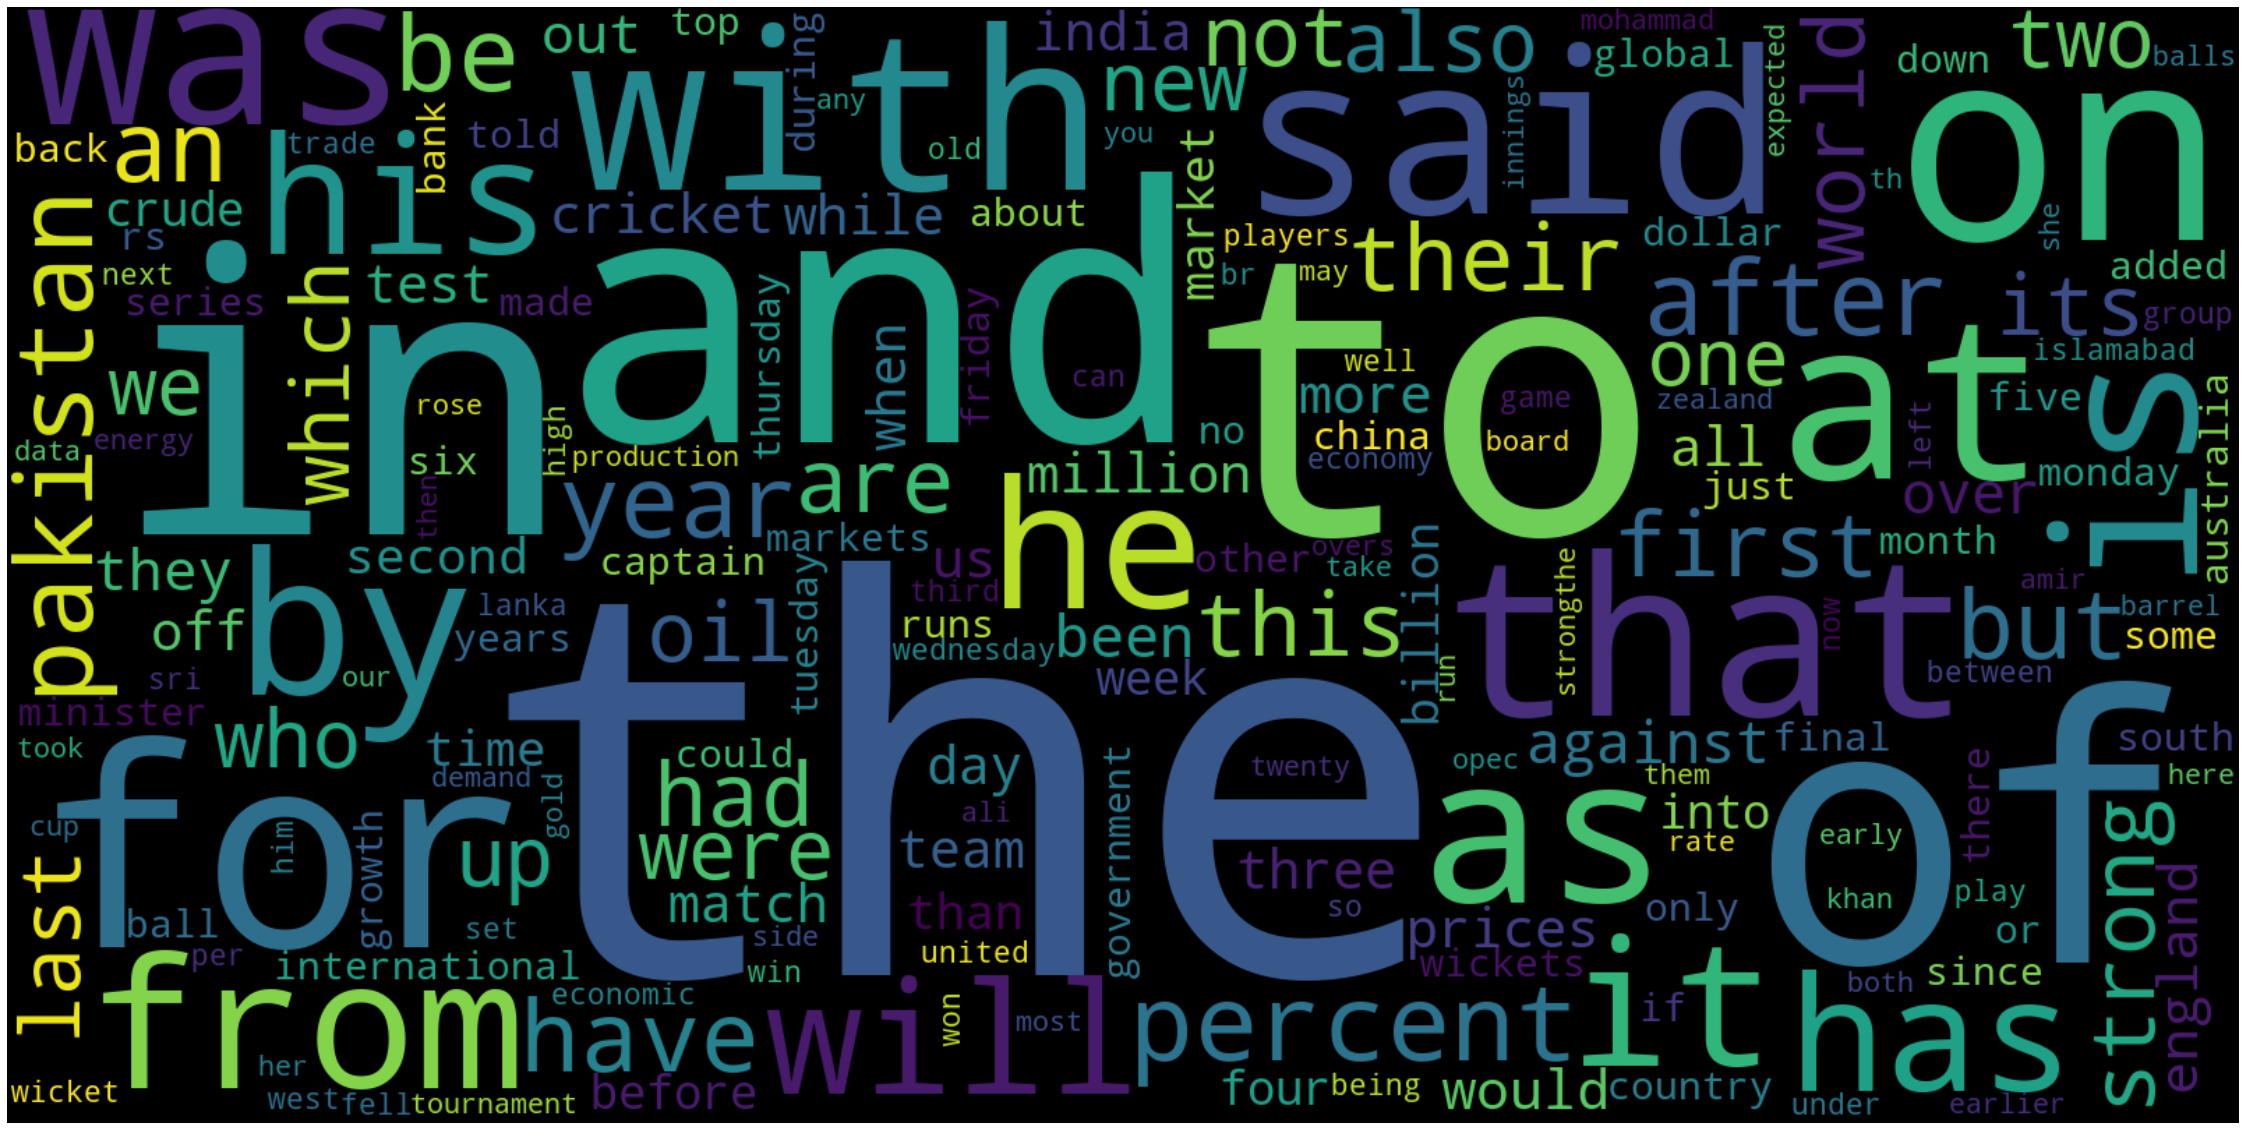

In [72]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [35]:
display('before: ', df_['token'].head())

'before: '

0    [karachi, the, sindh, government, has, decided...
1    [hong, kong, asian, markets, started, on, an, ...
2    [hong, kong, hong, kong, shares, opened, perce...
3    [hong, kong, asian, markets, tumbled, tuesday,...
4    [new, york, us, oil, prices, monday, slipped, ...
Name: token, dtype: object

In [36]:
df_['token'] = remove_stopwords(df_['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df_['token'] = lemmatization(df_['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [37]:
from collections import Counter

words = df_.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('say', 6599), ('year', 3641), ('percent', 3304), ('strong', 2330), ('first', 2110), ('last', 1945), ('also', 1945), ('price', 1854), ('oil', 1814), ('market', 1806), ('make', 1743), ('take', 1602), ('would', 1549), ('team', 1504), ('day', 1469), ('match', 1463), ('test', 1458), ('run', 1373), ('month', 1372), ('time', 1358), ('play', 1357), ('world', 1260), ('week', 1250), ('wicket', 1237), ('country', 1219), ('high', 1200), ('add', 1141), ('second', 1085), ('fall', 1041), ('come', 1022), ('ball', 1016), ('rise', 1003), ('could', 961), ('low', 948), ('go', 925), ('crude', 917), ('government', 916), ('player', 908), ('see', 878), ('rate', 872), ('global', 818), ('final', 817), ('good', 814), ('early', 813), ('dollar', 801), ('lead', 800), ('cricket', 782), ('include', 775), ('game', 774), ('give', 768), ('get', 766), ('start', 763), ('win', 755), ('new', 749), ('point', 748), ('expect', 747), ('end', 742), ('leave', 741), ('barrel', 740), ('tell', 737), ('score', 712), ('increase', 70

(-0.5, 1599.5, 799.5, -0.5)

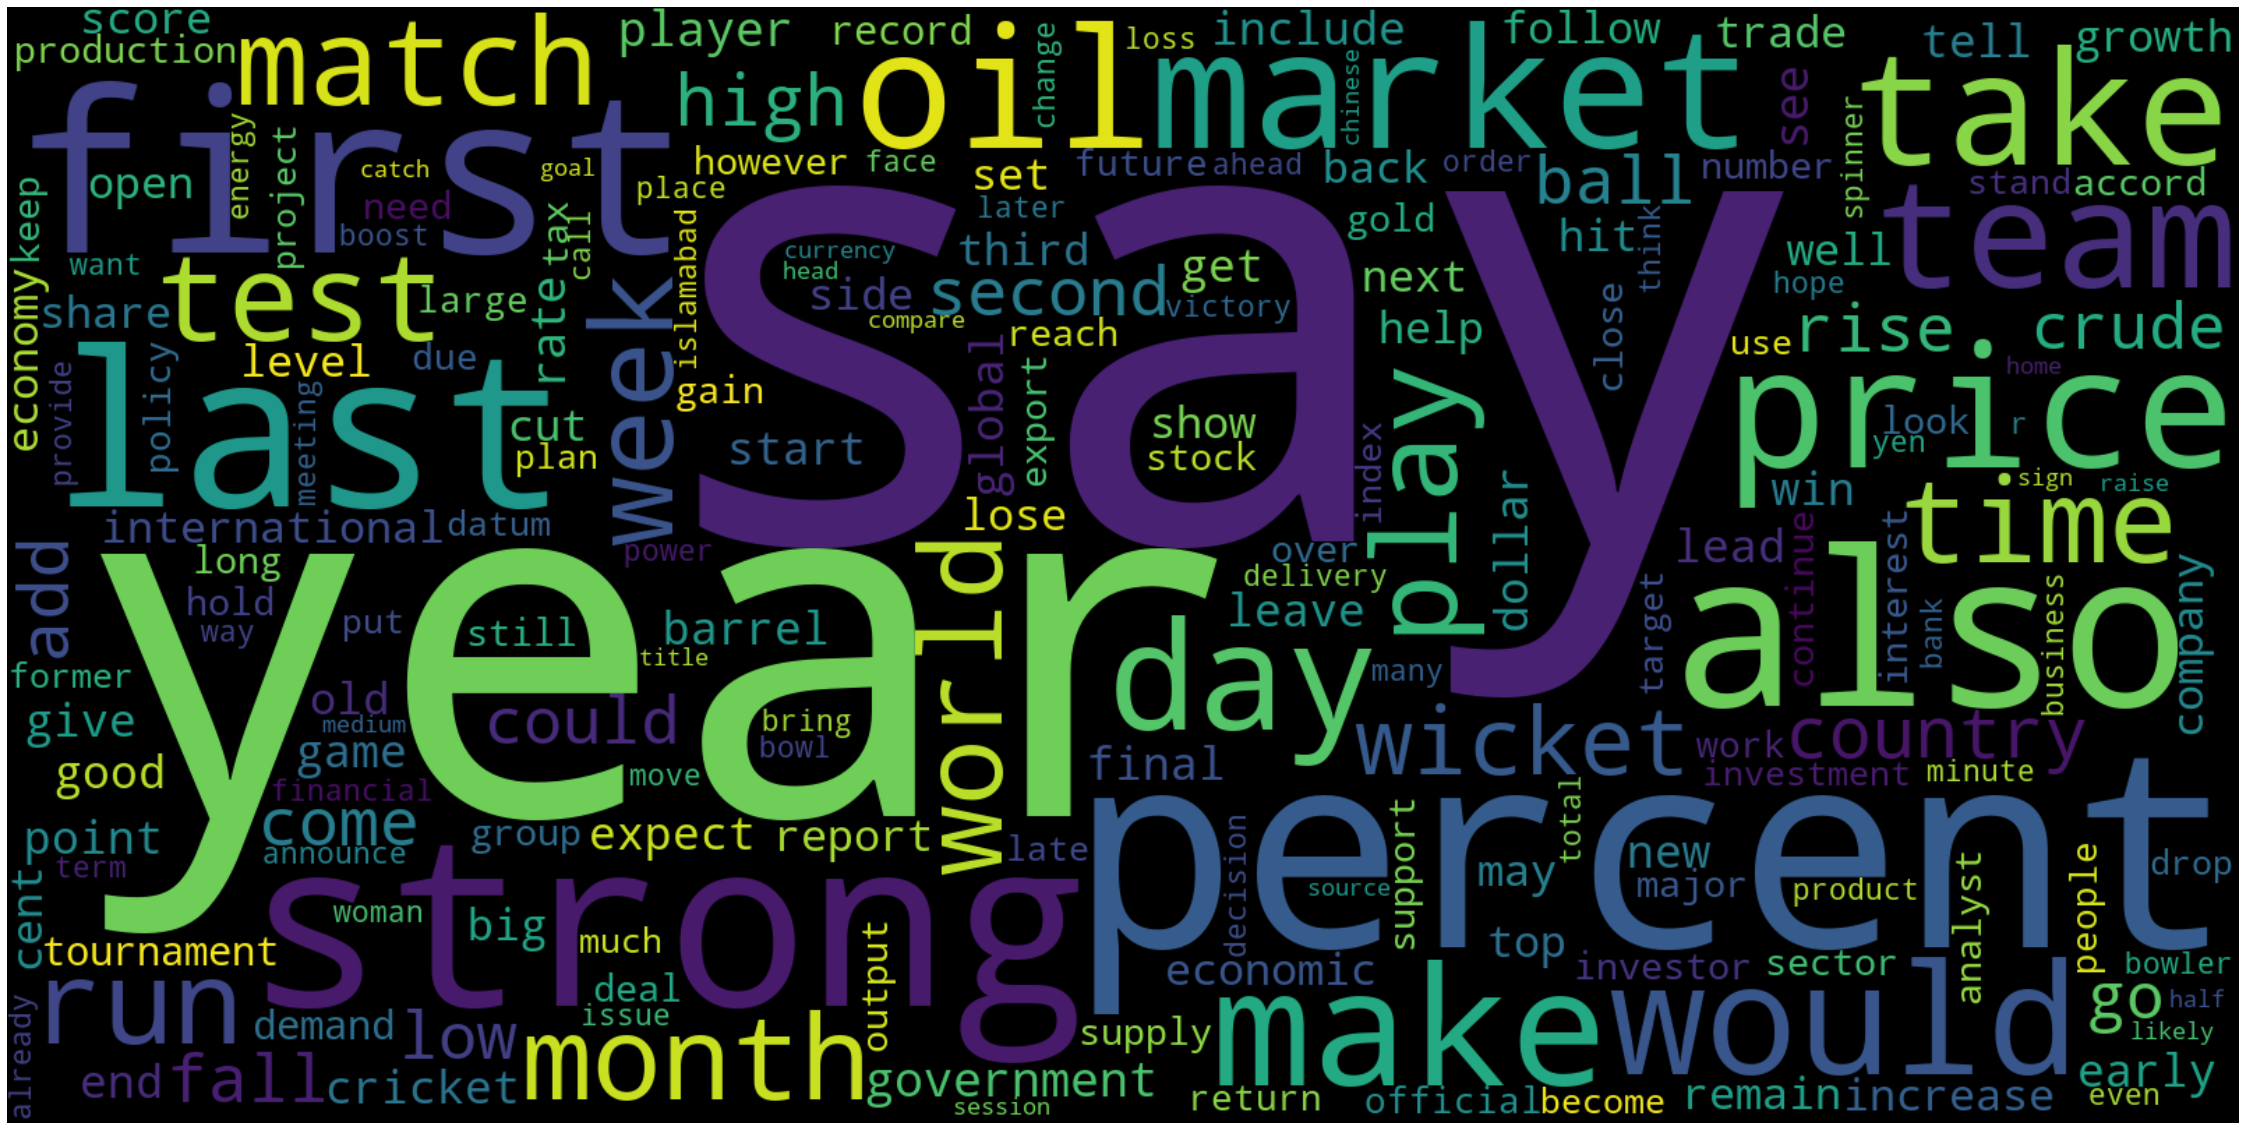

In [38]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

When I remove stop_words, words such as "to", "and", "in", "for" , and "the" that have high frequency and does not add much meaning to the articles are removed from the display.
 